# Importar módulos

In [15]:
import re
import sketch
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geojson
import folium
from folium.plugins import HeatMap
from summarytools import dfSummary

Importamos una serie de módulos que podría ser útil para en análisis

# Importar Tablas

In [16]:
homicidios = pd.read_excel("/Users/pablobrizzi/Desktop/PIDA/homicidios.xlsx")
homicidios.head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Al importar un xlsx sin aclarar qué página obtenemos por defecto la primera que es de nuestro mayor interés.

In [68]:
homicidios.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


A simple vista tenemos 696 filas. Hay una media de datos con año 2018. El año mínimo es 2016, la cantidad de víctimas es 1. El máximo de víctimas es 3.

In [69]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Acá tenemos todas las variables de la tabla, o todas sus columnas. Podemos ver que los nombres son variables y los tipos de datos podrían no estar en lo correcto o podrían inclusive estar mejor definidos.

In [17]:
victimas = pd.read_excel("/Users/pablobrizzi/Desktop/PIDA/homicidios.xlsx", sheet_name="VICTIMAS")
victimas.head(5)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Bajo el sheet_name "VICTIMAS" obtenemos la página que da un poco más de detalle sobre la fecha de ocurrencia del hecho, la edad, y el rol que ocupaba. Como así también la fecha de fallecimiento.

In [67]:
victimas.describe()

,FECHA,AAAA,MM,DD
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


En este caso tenemos 717 filas. Pero el resto de los datos numéricos interpretados por pandas nos deja analizar únicamente los relativos a la fecha desglosada.

In [70]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [19]:
victimas.rename(columns={'ID_hecho': 'id'}, inplace=True)

homicidios.rename(columns={"ID":"id"}, inplace=True)

Renombramos columnas para facilitar el merge entre las tablas.

In [21]:
victimas.columns

Index(['id', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

Repasamos que se haya aplicado el cambio.

In [22]:
siniestros = pd.merge(homicidios, victimas, how="inner", on="id")
siniestros

,id,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ACUSADO,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,AUTO,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,PASAJEROS,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,AUTO,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,SD,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,PASAJEROS,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,AUTO,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,AUTO,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,CARGAS,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,CARGAS,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


Realizamos el Merge bajo el DF llamado siniestros. Acá podemos observar que las columnas toman nombres dependiendo a la tabla a la que pertenecían. Además, sus datos string están en mayúsculas.

In [23]:
siniestros.columns = siniestros.columns.str.lower()
siniestros.head(5)

,id,n_victimas,fecha_x,aaaa_x,mm_x,dd_x,hora,hh,lugar_del_hecho,tipo_de_calle,...,acusado,fecha_y,aaaa_y,mm_y,dd_y,rol,victima_y,sexo,edad,fecha_fallecimiento
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,AUTO,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,PASAJEROS,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,AUTO,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,SD,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,PASAJEROS,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Convertimos los nombres de las columnas en minúsculas.

In [24]:
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     717 non-null    object        
 1   n_victimas             717 non-null    int64         
 2   fecha_x                717 non-null    datetime64[ns]
 3   aaaa_x                 717 non-null    int64         
 4   mm_x                   717 non-null    int64         
 5   dd_x                   717 non-null    int64         
 6   hora                   717 non-null    object        
 7   hh                     717 non-null    object        
 8   lugar_del_hecho        717 non-null    object        
 9   tipo_de_calle          717 non-null    object        
 10  calle                  716 non-null    object        
 11  altura                 133 non-null    float64       
 12  cruce                  540 non-null    object        
 13  direc

Observamos la cantidad de columnas resultantes y sus tipos de datos.

In [25]:
siniestros.rename(columns={"fecha_x":"fecha",
                           "aaaa_x": "año",
                           "mm_x": "mes",
                           "dd_x": "día",
                           "lugar_del_hecho": "lugar del hecho",
                           "tipo_de_calle": "tipo de calle",
                           "victima_x": "victima"}, inplace=True)

Renombramos las columas de interés para facilitar el tipeo y mejorar la legibilidad en una etapa posterior.

In [26]:
siniestros.columns

Index(['id', 'n_victimas', 'fecha', 'año', 'mes', 'día', 'hora', 'hh',
       'lugar del hecho', 'tipo de calle', 'calle', 'altura', 'cruce',
       'dirección normalizada', 'comuna', 'xy (caba)', 'pos x', 'pos y',
       'participantes', 'victima', 'acusado', 'fecha_y', 'aaaa_y', 'mm_y',
       'dd_y', 'rol', 'victima_y', 'sexo', 'edad', 'fecha_fallecimiento'],
      dtype='object')

Observamos el total de columnas para facilitar la selección.

In [27]:
siniestros0 = siniestros[["id", "fecha", "año", "mes",
                         "día", "hora", "hh", "dirección normalizada",
                         "tipo de calle",
                         "comuna", "xy (caba)", "pos x", "pos y",
                         "participantes", "acusado", "rol", "n_victimas", "victima", "sexo",
                         "edad", "fecha_fallecimiento"]]
siniestros0.head(5)

,id,fecha,año,mes,día,hora,hh,dirección normalizada,tipo de calle,comuna,...,pos x,pos y,participantes,acusado,rol,n_victimas,victima,sexo,edad,fecha_fallecimiento
0,2016-0001,2016-01-01,2016,1,1,04:00:00,4,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",AVENIDA,8,...,-58.47533969,-34.68757022,MOTO-AUTO,AUTO,CONDUCTOR,1,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,01:15:00,1,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",GRAL PAZ,9,...,-58.50877521,-34.66977709,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,1,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,07:00:00,7,ENTRE RIOS AV. 2034,AVENIDA,1,...,-58.39040293,-34.63189362,MOTO-AUTO,AUTO,CONDUCTOR,1,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,00:00:00,0,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",AVENIDA,8,...,-58.46503904,-34.68092974,MOTO-SD,SD,CONDUCTOR,1,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,05:20:00,5,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",AVENIDA,1,...,-58.38718297,-34.62246630,MOTO-PASAJEROS,PASAJEROS,CONDUCTOR,1,MOTO,MASCULINO,29,2016-02-01 00:00:00


Aquí rescatamos las columnas de interés.

In [28]:
siniestros0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     717 non-null    object        
 1   fecha                  717 non-null    datetime64[ns]
 2   año                    717 non-null    int64         
 3   mes                    717 non-null    int64         
 4   día                    717 non-null    int64         
 5   hora                   717 non-null    object        
 6   hh                     717 non-null    object        
 7   dirección normalizada  708 non-null    object        
 8   tipo de calle          717 non-null    object        
 9   comuna                 717 non-null    int64         
 10  xy (caba)              717 non-null    object        
 11  pos x                  717 non-null    object        
 12  pos y                  717 non-null    object        
 13  parti

In [29]:
siniestros0.rename(columns={"rol":"rol acusado",
                           "fecha_fallecimiento": "fecha fallecimiento",
                           "dirección normalizada": "dirección"}, inplace=True)

/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_46420/91564417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  siniestros0.rename(columns={"rol":"rol acusado",


Continuamos cambiando el nombre de las columnas.

In [30]:
siniestros0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   717 non-null    object        
 1   fecha                717 non-null    datetime64[ns]
 2   año                  717 non-null    int64         
 3   mes                  717 non-null    int64         
 4   día                  717 non-null    int64         
 5   hora                 717 non-null    object        
 6   hh                   717 non-null    object        
 7   dirección            708 non-null    object        
 8   tipo de calle        717 non-null    object        
 9   comuna               717 non-null    int64         
 10  xy (caba)            717 non-null    object        
 11  pos x                717 non-null    object        
 12  pos y                717 non-null    object        
 13  participantes        717 non-null  

In [31]:
siniestros0['día semana'] = siniestros0['fecha'].dt.strftime('%A')

/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_46420/2716551782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  siniestros0['día semana'] = siniestros0['fecha'].dt.strftime('%A')


Nos interesa contar con una columna que nos permita saber qué día de la semana era según la columna Fecha.

In [32]:
siniestros0.head(5)

,id,fecha,año,mes,día,hora,hh,dirección,tipo de calle,comuna,...,pos y,participantes,acusado,rol acusado,n_victimas,victima,sexo,edad,fecha fallecimiento,día semana
0,2016-0001,2016-01-01,2016,1,1,04:00:00,4,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",AVENIDA,8,...,-34.68757022,MOTO-AUTO,AUTO,CONDUCTOR,1,MOTO,MASCULINO,19,2016-01-01 00:00:00,Friday
1,2016-0002,2016-01-02,2016,1,2,01:15:00,1,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",GRAL PAZ,9,...,-34.66977709,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,1,AUTO,MASCULINO,70,2016-01-02 00:00:00,Saturday
2,2016-0003,2016-01-03,2016,1,3,07:00:00,7,ENTRE RIOS AV. 2034,AVENIDA,1,...,-34.63189362,MOTO-AUTO,AUTO,CONDUCTOR,1,MOTO,MASCULINO,30,2016-01-03 00:00:00,Sunday
3,2016-0004,2016-01-10,2016,1,10,00:00:00,0,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",AVENIDA,8,...,-34.68092974,MOTO-SD,SD,CONDUCTOR,1,MOTO,MASCULINO,18,SD,Sunday
4,2016-0005,2016-01-21,2016,1,21,05:20:00,5,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",AVENIDA,1,...,-34.62246630,MOTO-PASAJEROS,PASAJEROS,CONDUCTOR,1,MOTO,MASCULINO,29,2016-02-01 00:00:00,Thursday


Observamos que pudimos crearla sin problema pero nos interesa tenerla en español y no en inglés.

In [33]:
siniestros0['día semana'].replace({"Friday": "viernes",
                                   "Saturday": "sábado",
                                    "Sunday": "domingo",
                                    "Monday": "lunes",
                                    "Tuesday": "martes",
                                    "Wednesday": "miércoles",
                                    "Thursday": "jueves"}, inplace=True)


/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_46420/3055819499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  siniestros0['día semana'].replace({"Friday": "viernes",


Renombramos el nombre de los días de la semana a español.

In [34]:
siniestros0['fecha fallecimiento'] = pd.to_datetime(siniestros0['fecha fallecimiento'][siniestros0['fecha fallecimiento'] != "SD"])

/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_46420/615373604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  siniestros0['fecha fallecimiento'] = pd.to_datetime(siniestros0['fecha fallecimiento'][siniestros0['fecha fallecimiento'] != "SD"])


Según el PDF que acompaña las tablas del catálogo de datos del Gob de la Ciudad, pudimos observar que algunas variables cuentan con el dato SD (Sin Dato). Modificamos a tipo fecha todas las fechas de la columna fecha fallecimiento que no incluyan el dato "SD".

In [35]:
siniestros0['fecha fallecimiento'] = siniestros0['fecha fallecimiento'][siniestros0['fecha fallecimiento'] != "SD"].dt.date

/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_46420/4142371185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  siniestros0['fecha fallecimiento'] = siniestros0['fecha fallecimiento'][siniestros0['fecha fallecimiento'] != "SD"].dt.date


In [36]:
siniestros0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   717 non-null    object        
 1   fecha                717 non-null    datetime64[ns]
 2   año                  717 non-null    int64         
 3   mes                  717 non-null    int64         
 4   día                  717 non-null    int64         
 5   hora                 717 non-null    object        
 6   hh                   717 non-null    object        
 7   dirección            708 non-null    object        
 8   tipo de calle        717 non-null    object        
 9   comuna               717 non-null    int64         
 10  xy (caba)            717 non-null    object        
 11  pos x                717 non-null    object        
 12  pos y                717 non-null    object        
 13  participantes        717 non-null  

In [37]:
siniestros0['fecha fallecimiento'] = pd.to_datetime(siniestros0['fecha fallecimiento'][siniestros0['fecha fallecimiento'] != "SD"])

/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_46420/615373604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  siniestros0['fecha fallecimiento'] = pd.to_datetime(siniestros0['fecha fallecimiento'][siniestros0['fecha fallecimiento'] != "SD"])


Bajo esta línea de código convertimos los datos de manera exitosa.

In [38]:
siniestros0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   717 non-null    object        
 1   fecha                717 non-null    datetime64[ns]
 2   año                  717 non-null    int64         
 3   mes                  717 non-null    int64         
 4   día                  717 non-null    int64         
 5   hora                 717 non-null    object        
 6   hh                   717 non-null    object        
 7   dirección            708 non-null    object        
 8   tipo de calle        717 non-null    object        
 9   comuna               717 non-null    int64         
 10  xy (caba)            717 non-null    object        
 11  pos x                717 non-null    object        
 12  pos y                717 non-null    object        
 13  participantes        717 non-null  

In [39]:
siniestros0["día semana"]

0        viernes
1         sábado
2        domingo
3        domingo
4         jueves
         ...    
712        lunes
713        lunes
714       jueves
715    miércoles
716       jueves
Name: día semana, Length: 717, dtype: object

Corroboramos el cambio anterior de los días de la semana a español.

In [40]:
comunas = pd.read_csv("/Users/pablobrizzi/Desktop/PIDA/comunas.csv", sep=";")
comunas.head(5)

,WKT,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA
0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06
1,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06
2,MULTIPOLYGON (((-58.4883373673246 -34.62016035...,6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07
3,MULTIPOLYGON (((-58.498384839883 -34.596367656...,7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07
4,MULTIPOLYGON (((-58.5033113250844 -34.59385615...,8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07


Importamos una nueva tabla que nos permite conocer los barrios que pertenecen a cada comuna.

In [41]:
comunas = comunas[["COMUNAS", "BARRIOS"]]
comunas

,COMUNAS,BARRIOS
0,2.0,RECOLETA
1,6.0,CABALLITO
2,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...
3,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....
4,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...
5,14.0,PALERMO
6,15.0,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...
7,13.0,BELGRANO - COLEGIALES - NUÑEZ
8,4.0,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...
9,5.0,ALMAGRO - BOEDO


Seleccionamos únicamente nuestras columnas de interés.

In [42]:
comunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COMUNAS  15 non-null     float64
 1   BARRIOS  15 non-null     object 
dtypes: float64(1), object(1)
memory usage: 372.0+ bytes


In [43]:
comunas.columns = comunas.columns.str.lower()

Convertimos los nombres de las columnas a minúsculas.

In [44]:
comunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comunas  15 non-null     float64
 1   barrios  15 non-null     object 
dtypes: float64(1), object(1)
memory usage: 372.0+ bytes


In [45]:
comunas["comunas"] = comunas["comunas"].astype(int)

Convertimos en número de la comuna a tipo entero.

In [46]:
comunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comunas  15 non-null     int64 
 1   barrios  15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [47]:
comunas["barrios"] = comunas["barrios"].str.lower()

Convertimos los nombres de los barrios a minúsculas y visualizamos.

In [48]:
comunas.head(3)

,comunas,barrios
0,2,recoleta
1,6,caballito
2,10,floresta - monte castro - velez sarsfield - ve...


In [49]:
comunas.rename(columns={"comunas":"comuna"}, inplace=True)

In [50]:
siniestros1 = pd.merge(siniestros0, comunas, how="inner", on="comuna")
siniestros1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   715 non-null    object        
 1   fecha                715 non-null    datetime64[ns]
 2   año                  715 non-null    int64         
 3   mes                  715 non-null    int64         
 4   día                  715 non-null    int64         
 5   hora                 715 non-null    object        
 6   hh                   715 non-null    object        
 7   dirección            707 non-null    object        
 8   tipo de calle        715 non-null    object        
 9   comuna               715 non-null    int64         
 10  xy (caba)            715 non-null    object        
 11  pos x                715 non-null    object        
 12  pos y                715 non-null    object        
 13  participantes        715 non-null  

Creamos un nuevo dataframe para incluir este dato en la tabla principal.

In [51]:
siniestros1.to_csv("siniestros.csv", index=False)

Exportamos el progreso realizado.

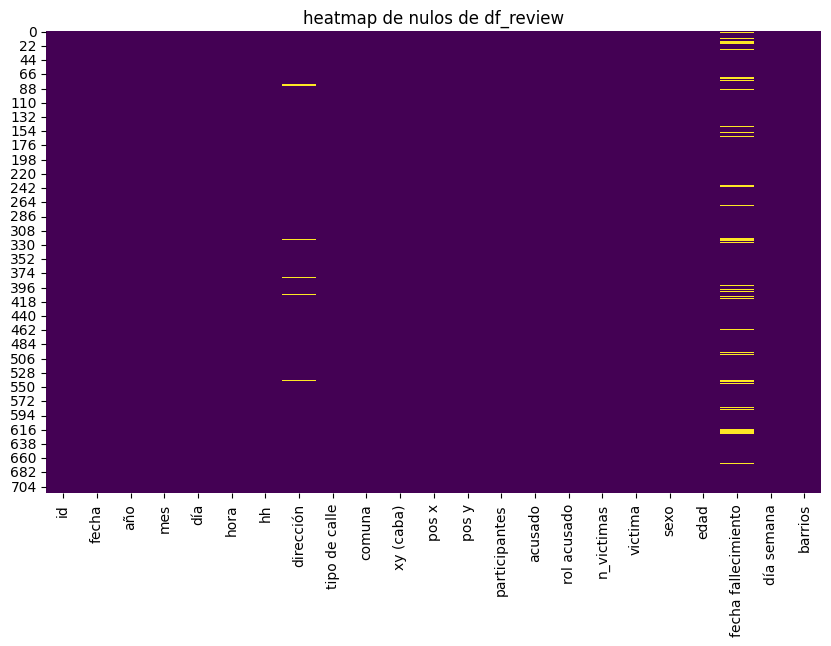

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(siniestros1.isnull(), cbar=False, cmap='viridis')
plt.title('heatmap de nulos de df_review')
plt.show()

Observamos la presencia de nulos en toda la tabla.

In [53]:
siniestros1.replace("SD", np.nan, inplace=True)

Convertimos aquellos datos como "SD" a nulos de numpy.

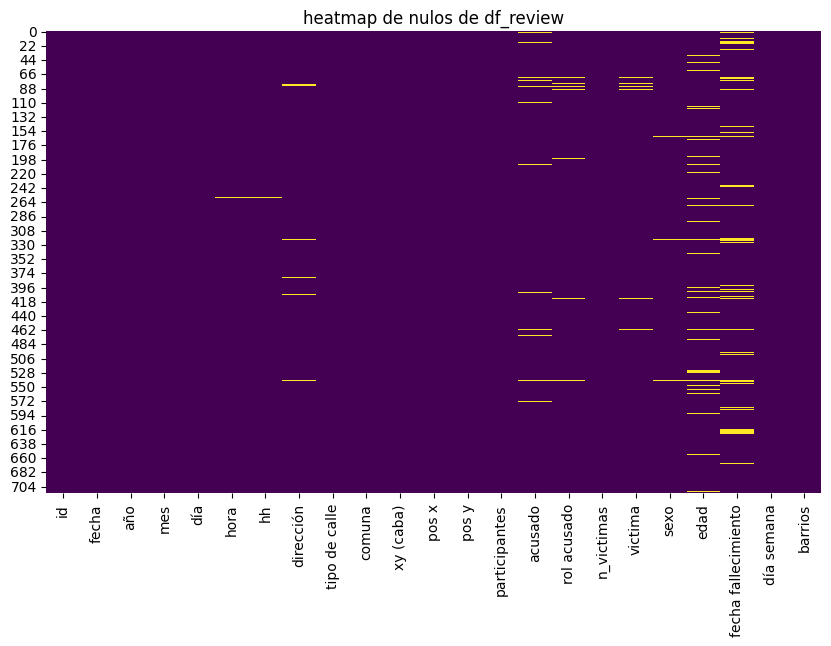

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(siniestros1.isnull(), cbar=False, cmap='viridis')
plt.title('heatmap de nulos de df_review')
plt.show()

Observamos el cambio.

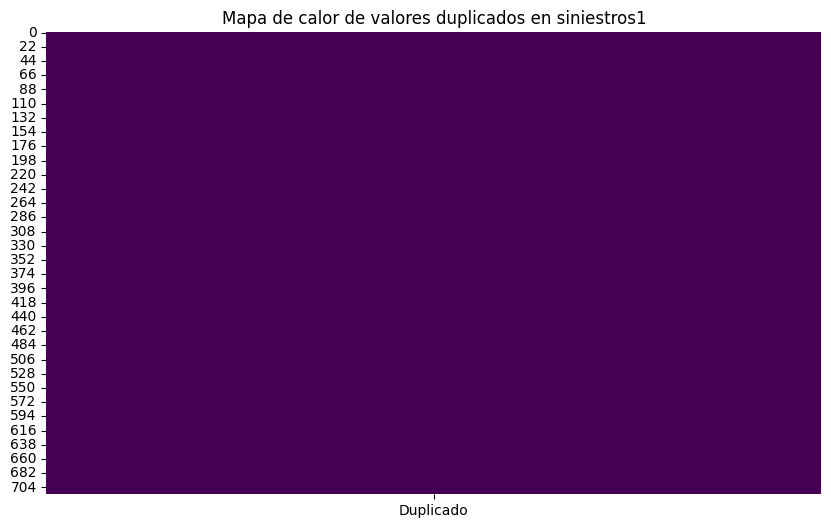

In [55]:
# Encuentra las filas duplicadas en el DataFrame
duplicados = siniestros1.duplicated()

# Crea un DataFrame con valores booleanos para indicar si cada valor es duplicado o no
duplicados_df = pd.DataFrame(duplicados, columns=['Duplicado'])

# Trama el mapa de calor basado en la presencia de duplicados
plt.figure(figsize=(10, 6))
sns.heatmap(duplicados_df, cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores duplicados en siniestros1')
plt.show()

No se observan valores duplicados.

In [56]:
siniestros1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   715 non-null    object        
 1   fecha                715 non-null    datetime64[ns]
 2   año                  715 non-null    int64         
 3   mes                  715 non-null    int64         
 4   día                  715 non-null    int64         
 5   hora                 714 non-null    object        
 6   hh                   714 non-null    float64       
 7   dirección            707 non-null    object        
 8   tipo de calle        715 non-null    object        
 9   comuna               715 non-null    int64         
 10  xy (caba)            715 non-null    object        
 11  pos x                715 non-null    object        
 12  pos y                715 non-null    object        
 13  participantes        715 non-null  

In [57]:
# Obtén una lista de columnas que contienen cadenas de texto
columnas_str = siniestros1.select_dtypes(include=['object']).columns

# Aplica la función str.lower() a todas las celdas de las columnas seleccionadas
siniestros1[columnas_str] = siniestros1[columnas_str].applymap(lambda x: x.lower() if isinstance(x, str) else x)

/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_46420/3062319266.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  siniestros1[columnas_str] = siniestros1[columnas_str].applymap(lambda x: x.lower() if isinstance(x, str) else x)


Con esta línea convertimos todas las variables string a minúsculas.

In [58]:
siniestros1.head(3)

,id,fecha,año,mes,día,hora,hh,dirección,tipo de calle,comuna,...,participantes,acusado,rol acusado,n_victimas,victima,sexo,edad,fecha fallecimiento,día semana,barrios
0,2016-0001,2016-01-01,2016,1,1,04:00:00,4.0,"piedra buena av. y fernandez de la cruz, f., g...",avenida,8,...,moto-auto,auto,conductor,1,moto,masculino,19.0,2016-01-01,viernes,villa lugano - villa riachuelo - villa soldati
1,2016-0004,2016-01-10,2016,1,10,00:00:00,0.0,"larrazabal av. y villegas, conrado, gral.",avenida,8,...,moto-sd,NaN,conductor,1,moto,masculino,18.0,NaT,domingo,villa lugano - villa riachuelo - villa soldati
2,2016-0008,2016-01-24,2016,1,24,18:30:00,18.0,27 de febrero av. y escalada av.,avenida,8,...,moto-objeto fijo,objeto fijo,conductor,1,moto,masculino,30.0,2016-01-24,domingo,villa lugano - villa riachuelo - villa soldati


Observamos los cambios.

In [59]:
siniestros1.to_csv("siniestros.csv", index=False)

Exportamos la nueva tabla.

# Duplicados

In [61]:
filas_duplicadas = siniestros1[siniestros1.duplicated()]
filas_duplicadas

,id,fecha,año,mes,día,hora,hh,dirección,tipo de calle,comuna,...,participantes,acusado,rol acusado,n_victimas,victima,sexo,edad,fecha fallecimiento,día semana,barrios


Corroboramos que no haya datos duplicados que no se hayan observado en el gráfico.

# Outliers

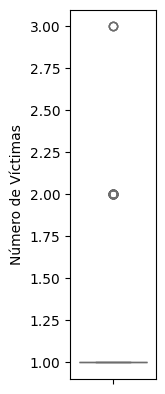

In [60]:
plt.subplot(1, 5, 1) 
sns.boxplot(data=siniestros1, y='n_victimas', color = "#FA8072")
plt.ylabel('Número de Víctimas')

plt.show()

Gracias a este gráfico y los datos del describe sabemos que las víctimas son 1 en casi todos los casos y 2 y 3 en menor medida como outliers.

Text(0, 0.5, 'Años')

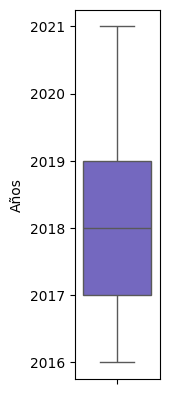

In [62]:
plt.subplot(1, 5, 2) 
sns.boxplot(data=siniestros1, y='año', color = "#6A5ACD")
plt.ylabel('Años')

No tenemos outliers por año pero sí una concentración entre 2017 y 2019.

Text(0, 0.5, 'Meses')

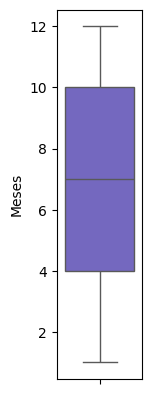

In [63]:
plt.subplot(1, 5, 2) 
sns.boxplot(data=siniestros1, y='mes', color = "#6A5ACD")
plt.ylabel('Meses')

No tenemos outliers pero sí una concentración entre los meses lectivos de escuelas y universidades (abril a octubre).

Text(0, 0.5, 'Días')

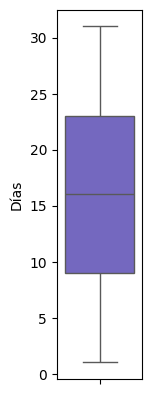

In [64]:
plt.subplot(1, 5, 2) 
sns.boxplot(data=siniestros1, y='día', color = "#6A5ACD")
plt.ylabel('Días')

Sin outliers pero con una concentración entre el 9 y 23 de cada mes.

Text(0, 0.5, 'Horas')

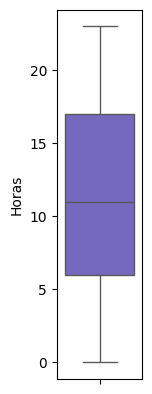

In [66]:
plt.subplot(1, 5, 2) 
sns.boxplot(data=siniestros1, y='hh', color = "#6A5ACD")
plt.ylabel('Horas')

Sin outliers pero con una concentración entre las 6 y 17 hora aproximadamente.